# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

The file contains information of many songs. For each song, it contains:

- title
- artist
- year
- popularity
- duration
- tempo

We do not have the unit for popularity, all we know is that popularity is a float.

### Step 1b: Planning 
#### Write a description of what your program will produce

- a line chart of the average duration of all songs
- creates bar graph that plot the number of songs in a particular tempo range
- creates bar graph that plot the number of songs in each year

Our program will create a bar graph that plot the number of songs in these years - 1990 to 2010, and help us figure out the year with the most number of songs

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

##### plot_bar_graph('songs.csv'), None)
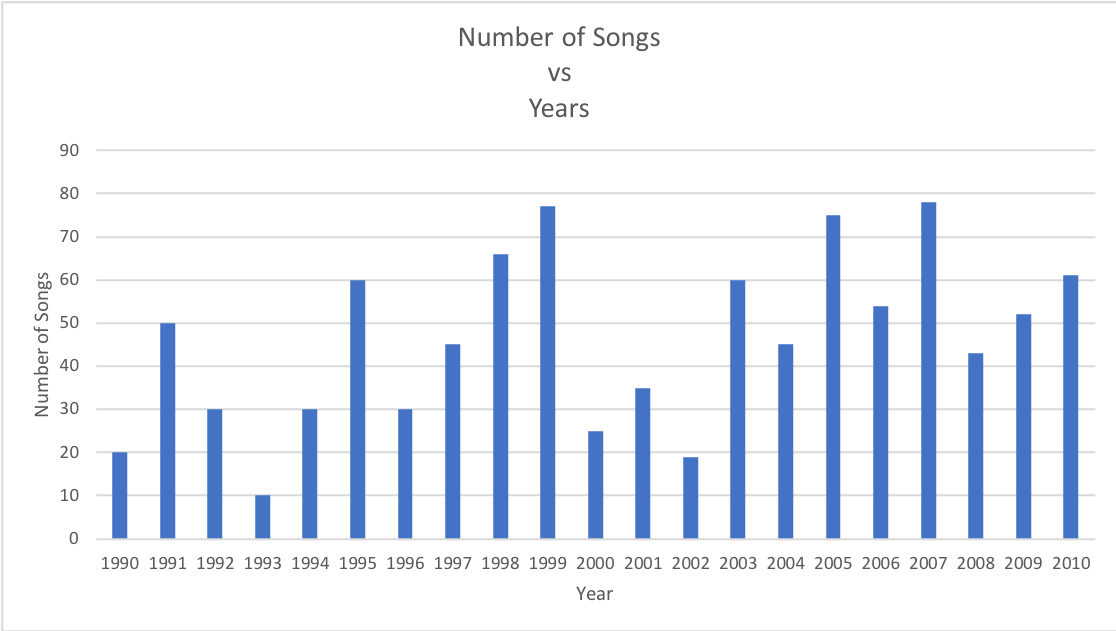

### Step 2a: Building
#### Design data definitions

- We'll need a data definition for songs which include the title and the year so we know what song belongs to which year. 

- We also need a list of all the songs in our file in order to create helper functions that take the list of songs and return the number of songs in the years we are interested in

In [1]:
from cs103 import *
from typing import NamedTuple, List
import matplotlib.pyplot as plt
import csv

##################
# Data Definitions

Songs = NamedTuple('Songs', [('title', str),
                            ('year', int)])   #in range [1990, 2013]
#interp. Song with a title and year.
S1 = Songs("Silent Night", 2003)
S2 = Songs("L'antarctique", 2007)
S3 = Songs("On the Surface", 2005)
S4 = Songs("Le mauvais coton", 1990)
S5 = Songs("Gnostalgia", 2000)
S6 = Songs("Britannia", 2009)
S7 = Songs("White Baby", 2010)
S8 = Songs("From A Window", 1979)

@typecheck
def fn_for_songs(s: Songs) -> ...:  #template based on compound
    return ...(s.title, 
               s.year)



# List[Songs]
# interp. a list of Songs

LOS0 = []
LOS1 = [S1]
LOS2 = [S1, S2, S3]
LOS3 = [S1, S2, S3, S4, S5, S6, S7, S8]

#template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_los(los: List[Songs]) -> ...:
    #description of acc
    acc = ... # type:...
    for s in los:
        acc = ...(fn_for_songs(s), acc)
    return...(acc)


<>:23: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:42: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:23: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:42: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<ipython-input-1-b7a5cf261d05>:23: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return ...(s.title,
<ipython-input-1-b7a5cf261d05>:42: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  acc = ...(fn_for_songs(s), acc)
<ipython-input-1-b7a5cf261d05>:43: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return...(acc)


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

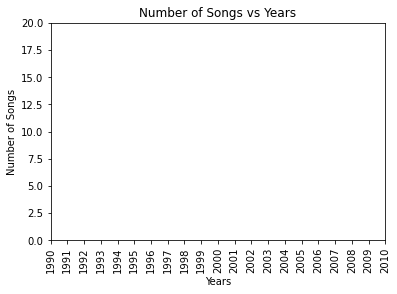

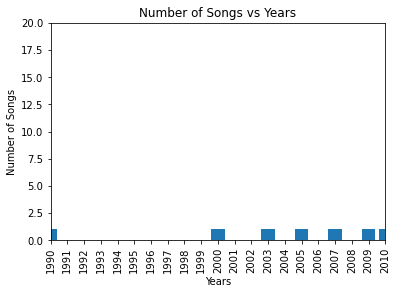

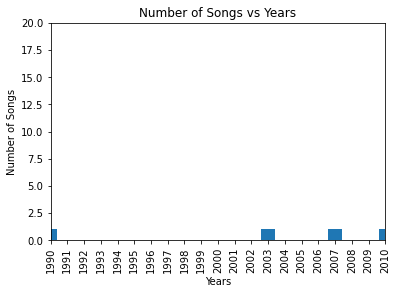

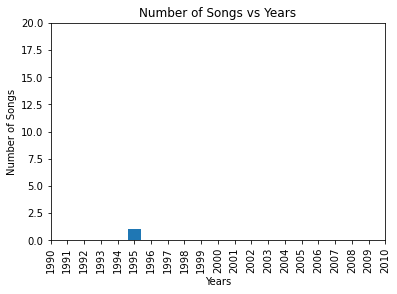

14 of 14 tests passed


In [2]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, returns a bar graph of the number of songs vs years 
    """
    # return None #stub
    # Template from HtDAP, based on function composition 
    return plot_songs(read(filename))
    
    
@typecheck
def read(filename: str) -> List[Songs]:
    """    
    reads information from the specified file and returns a list of songs data
    """
    #return []  #stub
    # Template from HtDAP
    # los contains the result so far
    los = [] # type: List[Songs]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip first header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            s = Songs(row[0], parse_int(row[2]))
            los.append(s)
    
    return los


@typecheck
def plot_songs(los: List[Songs]) -> None: 
    """ 
    takes a list of songs and returns a bar graph of number of songs vs years
    """ 
    
    # return None #stub
    # template based on visualization
    num_songs = filter_songs(filter_years(los))
    
    bar_width = 4
     
    opacity = 0.6
    
    #since I already know I am looking for the number of songs in the range of 1990 - 2010 
    #I can set my x values accordingly
    x_values = [1990, 1991, 1992, 1993, 1994, 1995,
           1996, 1997, 1998, 1999, 2000, 2001,
           2002, 2003, 2004, 2005, 2006, 2007,
           2008, 2009, 2010]
    
    plt.bar(x_values, num_songs) 
    
    plt.xlabel('Years')
    plt.ylabel('Number of Songs')
    plt.title('Number of Songs vs Years')
    
    plt.axis([1990, 2010, 0, 20])
    
    tick_labels = x_values
    
    plt.xticks(x_values, tick_labels, rotation='vertical')
    
    plt.show()
    
    return None

@typecheck
def filter_songs(los: List[Songs]) -> List[int]:
    '''
    takes a list of songs and returns a list of integer indicating the number of songs that corresponds
    to each year
    '''
    #return [] #stub
    #template based on List[Songs]
    
    #acc description
    acc = [0] * 21 # type: List[int]
    for s in los:
            acc[s.year - 1990] = acc[s.year - 1990] + 1

    return acc

@typecheck
def filter_years(los: List[Songs]) -> List[Songs]:
    '''
    takes a list of songs and returns a list of songs in the range (year) of 1990 - 2010.
    '''
    #return [] #stub
    #template copied from List[Songs]
    
    # acc stores the songs seen so far 
    acc = [] # type: List[Songs]
    for s in los:
        if in_range(s):
            acc.append(s)
    return acc

@typecheck
def in_range(s: Songs) -> bool:
    '''
    return True if the song is in range 1990 - 2010
    '''
    #return True
    #template copied from Songs
    if s.year >= 1990 and s.year <= 2010:
        return True
    else:
        return False


start_testing()

expect(in_range(S1), True)
expect(in_range(S8), False)
expect(in_range(S4), True)
expect(in_range(S7), True)

expect(filter_years([]), [])
expect(filter_years([S1, S2, S3, S4, S5, S6, S7, S8]), [S1, S2, S3, S4, S5, S6, S7])

expect(filter_songs([]), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
expect(filter_songs(LOS3), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

expect(read('songstest1.csv'), [Songs('Silent Night', 2003), 
                                Songs("L'antarctique", 2007), 
                                Songs('Le mauvais coton', 1990), 
                                Songs('White Baby', 2010), 
                                Songs('From A Window', 1979)])
expect(read('songstest2.csv'), [Songs('Knowledge', 1989), 
                                Songs('Tell Me Mama', 1995)])

expect(plot_songs([]), None)
expect(plot_songs(LOS3), None)

expect(main('songstest1.csv'), None)
expect(main('songstest2.csv'), None)

summary()




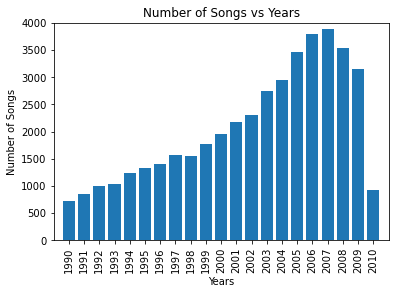

In [7]:
@typecheck
def plot_songs_csv(los: List[Songs]) -> None: 
    """ 
    takes a list of songs and returns a bar graph of number of songs vs years
    """ 
    
    # return None #stub
    # template based on visualization
    num_songs = filter_songs(filter_years(los))
    
    bar_width = 4
     
    opacity = 0.6
    
    #since I already know I am looking for the number of songs in the range of 1990 - 2010 
    #I can set my x values accordingly
    x_values = [1990, 1991, 1992, 1993, 1994, 1995,
           1996, 1997, 1998, 1999, 2000, 2001,
           2002, 2003, 2004, 2005, 2006, 2007,
           2008, 2009, 2010]
    
    plt.bar(x_values, num_songs) 
    
    plt.xlabel('Years')
    plt.ylabel('Number of Songs')
    plt.title('Number of Songs vs Years')
    
    plt.axis([1989, 2011, 0, 4000])
    
    tick_labels = x_values
    
    plt.xticks(x_values, tick_labels, rotation='vertical')
    
    plt.show()
    
    return None

plot_songs_csv(read('songs.csv'))